In [5]:
pip install mysql-connector-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 2.3 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


# ------------------Capstone Project Phase 3 (SQL Operations)-----------------


# BY: Aakash bindal.

# Batch Number:DS2401.

# SQL Operations

Note: Create a separate table for each file and give a meaningful name.



When you are inserting make sure you are NOT inserting the column name in the table, else you don’t get a result.



3.1	        Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.



3.2	Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year.



3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year.



3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table



3.5	Write SQL query to find the highest number of dacoity/robbery in which district.



3.6	Write SQL query to find in which districts(All) the lowest number of murders happened.



3.7	Write SQL query to find the number of murders in ascending order in district and year wise.



3.8.1	Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.



3.8.2	Write SQL query to find which District in each state/UT has the highest number of murders year wise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS.



3.8.3	Store the above data (the result of 3.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/UT, district, murders, and year in descending order.



3.8.4	Use appropriate graphs to show your data (the result of 3.8.3).

In [1]:
import mysql.connector 
import pandas as pd

In [37]:
# Define connection parameters
host = 'localhost'
user = 'root'
password = 'Aakash001@'
database = 'capstone'

# Connect to the database
mydb = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)
print(mydb)

In [38]:
#check database
mycursor = mydb.cursor()

mycursor.execute('SHOW DATABASEs')

for x in mycursor:
    print(x)

('Amazon',)
('capstone',)
('information_schema',)
('mysql',)
('performance_schema',)
('school',)
('sys',)


In [39]:
mycursor = mydb.cursor()
mycursor.execute('USE capstone')

In [40]:
mycursor.execute('show tables')
for  x in mycursor:
    print(x)

('district_wise_crimes_women',)
('ST',)


Comment-

district_wise_crimes_women==42_District_wise_crimes_committed_against_women_2001_2012.csv into a table.

ST==02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table.

crime_statistics_IPC==01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table.

# ----------------------------------------------------------------------------------------- 3.1	Insert records from 42_District_wise_crimes_committed_against_women_2001_2012.csv into a table-----------------------------------------------------------------------------

In [6]:
# Read the Excel file
df = pd.read_csv('https://raw.githubusercontent.com/aakash0101/Capstone-project/main/india_crime_files/42_District_wise_crimes_committed_against_women_2001_2012.csv')
df

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
9014,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
9015,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


In [7]:
df.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'],
      dtype='object')

In [8]:
# Create table
create_table_query = """
CREATE TABLE IF NOT EXISTS district_wise_crimes_women (
    `STATE_UT` VARCHAR(255),
    `DISTRICT` VARCHAR(255),
    `Year` INT,
    `Rape` INT,
    `Kidnapping_and_Abduction` INT,
    `Dowry_Deaths` INT,
    `Assault_on_women_with_intent_to_outrage_her_modesty` INT,
    `Insult_to_modesty_of_Women` INT,
    `Cruelty_by_Husband_or_his_Relatives` INT,
    `Importation_of_Girls` INT
)
"""
mycursor.execute(create_table_query)

In [9]:
for index, row in df.iterrows():
    sql =  """
    INSERT INTO district_wise_crimes_women (
        `STATE_UT`, `DISTRICT`, `Year`, `Rape`, `Kidnapping_and_Abduction`,
        `Dowry_Deaths`, `Assault_on_women_with_intent_to_outrage_her_modesty`,
        `Insult_to_modesty_of_Women`, `Cruelty_by_Husband_or_his_Relatives`, `Importation_of_Girls`
    ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """  # Replace with your actual columns and placeholders
    mycursor.execute(sql, tuple(row))

# Commit changes
mydb.commit()

In [16]:
sql="SELECT * FROM district_wise_crimes_women"

mycursor.execute(sql)
myresult = mycursor.fetchall()
result= pd.DataFrame(myresult,columns=['STATE/UT', 'DISTRICT', 'Year', 'Rape', 'Kidnapping and Abduction',
       'Dowry Deaths', 'Assault on women with intent to outrage her modesty',
       'Insult to modesty of Women', 'Cruelty by Husband or his Relatives',
       'Importation of Girls'])
result

,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0
...,...,...,...,...,...,...,...,...,...,...
18029,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,1,0,1,0
18030,LAKSHADWEEP,TOTAL,2012,0,0,0,1,0,1,0
18031,PUDUCHERRY,KARAIKAL,2012,6,2,0,2,0,1,0
18032,PUDUCHERRY,PUDUCHERRY,2012,7,14,0,7,2,5,0


# ---------------------------------------------------------------------------------------- 3.2 Write SQL query to find the highest number of rapes & Kidnappings that happened in which state, District, and year------------------------------------

In [11]:
sql="SELECT max(Rape), max(Kidnapping_and_Abduction) FROM district_wise_crimes_women"

mycursor.execute(sql)
myresult = mycursor.fetchall()
print('Maximum Rape case -',myresult[0][0])
print('Maximum Kidnapping & Abduction Case - ',myresult[0][1])

Maximum Rape case - 3425
Maximum Kidnapping & Abduction Case -  7910


In [15]:
sql="SELECT STATE_UT,DISTRICT,Year, MAX(Rape) AS Max_Rapes, MAX(Kidnapping_and_Abduction) AS Max_Kidnappings FROM district_wise_crimes_women GROUP BY STATE_UT, DISTRICT,Year"

mycursor.execute(sql)
myresult = mycursor.fetchall()

result= pd.DataFrame(myresult,columns=['STATE_UT','DISTRICT','Year','Max_Rapes','Max_Kidnappings'])
result

,STATE_UT,DISTRICT,Year,Max_Rapes,Max_Kidnappings
0,ANDHRA PRADESH,ADILABAD,2001,50,30
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30
2,ANDHRA PRADESH,CHITTOOR,2001,27,34
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26
...,...,...,...,...,...
9011,LAKSHADWEEP,LAKSHADWEEP,2012,0,0
9012,LAKSHADWEEP,TOTAL,2012,0,0
9013,PUDUCHERRY,KARAIKAL,2012,6,2
9014,PUDUCHERRY,PUDUCHERRY,2012,7,14


# ----------------------------------------------------------------------------------------- 3.3	Write SQL query to find All the lowest number of rapes & Kidnappings that happened in which state, District, and year----------------------------------

In [18]:
sql="SELECT MIN(Rape), MIN(Kidnapping_and_Abduction) FROM district_wise_crimes_women"

mycursor.execute(sql)
myresult = mycursor.fetchall()
print('Minimum Rape case -',myresult[0][0])
print('Minimum Kidnapping & Abduction Case - ',myresult[0][1])

Minimum Rape case - 0
Minimum Kidnapping & Abduction Case -  0


In [20]:
sql="SELECT STATE_UT,DISTRICT,Year, MIN(Rape) AS Min_Rapes, MIN(Kidnapping_and_Abduction) AS Min_Kidnappings FROM district_wise_crimes_women GROUP BY STATE_UT, DISTRICT,Year"

mycursor.execute(sql)
myresult2 = mycursor.fetchall()
result= pd.DataFrame(myresult2,columns=['STATE_UT','DISTRICT','Year','Min_Rapes','Min_Kidnappings'])
result

,STATE_UT,DISTRICT,Year,Min_Rapes,Min_Kidnappings
0,ANDHRA PRADESH,ADILABAD,2001,50,30
1,ANDHRA PRADESH,ANANTAPUR,2001,23,30
2,ANDHRA PRADESH,CHITTOOR,2001,27,34
3,ANDHRA PRADESH,CUDDAPAH,2001,20,20
4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26
...,...,...,...,...,...
9011,LAKSHADWEEP,LAKSHADWEEP,2012,0,0
9012,LAKSHADWEEP,TOTAL,2012,0,0
9013,PUDUCHERRY,KARAIKAL,2012,6,2
9014,PUDUCHERRY,PUDUCHERRY,2012,7,14


# ---------------------------------------------------------------------------------------- 3.4	Insert records from 02_District_wise_crimes_committed_against_ST_2001_2012.csv into a new table -------------------------------------------------------------------------------

In [21]:
# Read the Excel file
df1 = pd.read_csv('https://raw.githubusercontent.com/aakash0101/Capstone-project/main/india_crime_files/02_District_wise_crimes_committed_against_ST_2001_2012.csv')
df1

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


In [22]:
df1.columns

Index(['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'],
      dtype='object')

In [27]:
# Create table
create_table_query = """
CREATE TABLE IF NOT EXISTS ST (
    `STATE_UT` VARCHAR(255),
    `DISTRICT` VARCHAR(255),
    `Year` INT,
    `Murder` INT,
    `Rape` INT,
    `Kidnapping_Abduction` INT,
    `Dacoity` INT,
    `Robbery` INT,
    `Arson` INT,
    `Hurt` INT,
    `Protection_of_Civil_Rights_(PCR)_Act` INT,
    `Prevention_of_atrocities_(POA)_Act` INT,
    `Other_Crimes_Against_STs` INT
)
"""
mycursor.execute(create_table_query)

In [29]:
# Insert data into the table
for index, row in df1.iterrows():
    insert_query = """
    INSERT INTO ST (`STATE_UT`, `DISTRICT`, `Year`, `Murder`, `Rape`, 
    `Kidnapping_Abduction`, `Dacoity`, `Robbery`, `Arson`, `Hurt`, 
    `Protection_of_Civil_Rights_(PCR)_Act`, `Prevention_of_atrocities_(POA)_Act`, 
    `Other_Crimes_Against_STs`) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    mycursor.execute(insert_query, tuple(row))

# Commit changes
mydb.commit()

In [30]:
# st - is renamed table.
sql="SELECT * FROM ST"

mycursor.execute(sql)
myresult = mycursor.fetchall()
result= pd.DataFrame(myresult,columns=['STATE/UT', 'DISTRICT', 'Year', 'Murder', 'Rape',
       'Kidnapping Abduction', 'Dacoity', 'Robbery', 'Arson', 'Hurt',
       'Protection of Civil Rights (PCR) Act',
       'Prevention of atrocities (POA) Act', 'Other Crimes Against STs'])
result

,STATE/UT,DISTRICT,Year,Murder,Rape,Kidnapping Abduction,Dacoity,Robbery,Arson,Hurt,Protection of Civil Rights (PCR) Act,Prevention of atrocities (POA) Act,Other Crimes Against STs
0,ANDHRA PRADESH,ADILABAD,2001,0,1,2,0,0,0,2,0,0,13
1,ANDHRA PRADESH,ANANTAPUR,2001,0,0,0,0,0,0,7,0,1,6
2,ANDHRA PRADESH,CHITTOOR,2001,0,0,0,0,0,0,2,0,0,0
3,ANDHRA PRADESH,CUDDAPAH,2001,0,0,0,0,0,0,2,0,2,0
4,ANDHRA PRADESH,EAST GODAVARI,2001,0,0,0,0,0,0,0,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9013,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,0,0,0
9014,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,0,0,0
9015,PUDUCHERRY,KARAIKAL,2012,0,0,0,0,0,0,0,0,0,0
9016,PUDUCHERRY,PUDUCHERRY,2012,0,0,0,0,0,0,0,0,0,0


# ------------------------------------------------------------------------------------------- 3.5 Write SQL query to find the highest number of dacoity/robbery in which district                                                                                                                             ----------------------------------------------------------------------------

In [32]:
sql="SELECT max(Dacoity) as max_Dacoity, max(Robbery) as max_Robbery from ST order by DISTRICT,Dacoity,Robbery"

mycursor.execute(sql)
myresult = mycursor.fetchall()
print('MAX_Dacoity -',myresult[0][0])
print('MAX_Robbery - ',myresult[0][1])

MAX_Dacoity - 29
MAX_Robbery -  34


# ----------------------------------------------------------------------------------------- 3.6 Write SQL query to find in which districts(All) the lowest number of murders happened---------------------------------------------------------------

In [33]:
sql="SELECT District, MIN(Murder) AS Lowest_Murder FROM ST GROUP BY District ORDER BY Lowest_Murder"

mycursor.execute(sql)
myresult = mycursor.fetchall()
result= pd.DataFrame(myresult,columns=['DISTRICT','Lowest_Murder'])
result

,DISTRICT,Lowest_Murder
0,ADILABAD,0
1,ANANTAPUR,0
2,CHITTOOR,0
3,CUDDAPAH,0
4,EAST GODAVARI,0
...,...,...
808,JHARGRAM,0
809,SILIGURI_PC,0
810,CAR,0
811,KONDAGAON,1


# ----------------------------------------------------------------------------------------- 3.7 Write SQL query to find the number of murders in ascending order in district and yearwise-------------------------------------------------------------

In [34]:
sql="SELECT District, Year, SUM(Murder) AS Total_Murders FROM ST GROUP BY District, Year ORDER BY District ASC, Year ASC, Total_Murders ASC"

mycursor.execute(sql)
myresult=mycursor.fetchall()
result= pd.DataFrame(myresult,columns=['DISTRICT','Year','Total_Murders'])
result

,DISTRICT,Year,Total_Murders
0,24 PARGANAS NORTH,2001,0
1,24 PARGANAS NORTH,2002,0
2,24 PARGANAS NORTH,2003,0
3,24 PARGANAS NORTH,2004,0
4,24 PARGANAS NORTH,2005,0
...,...,...,...
8414,ZUNHEBOTO,2008,0
8415,ZUNHEBOTO,2009,0
8416,ZUNHEBOTO,2010,0
8417,ZUNHEBOTO,2011,0


# ----------------------------------------------------------------------------------------- 3.8.1 Insert records of STATE/UT, DISTRICT, YEAR, MURDER, ATTEMPT TO MURDER, and RAPE columns only from 01_District_wise_crimes_committed_IPC_2001_2012.csv into a new table -------------------------------------------------------------------------------------------


In [41]:
mycursor.execute('show tables')
for  x in mycursor:
    print(x)

('district_wise_crimes_women',)
('ST',)


In [42]:
# Read the Excel file
df2 = pd.read_csv('https://raw.githubusercontent.com/aakash0101/Capstone-project/main/india_crime_files/01_District_wise_crimes_committed_IPC_2001_2012.csv')
df2

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9012,LAKSHADWEEP,LAKSHADWEEP,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9013,LAKSHADWEEP,TOTAL,2012,0,0,0,0,0,0,0,...,3,3,0,1,0,1,0,0,32,60
9014,PUDUCHERRY,KARAIKAL,2012,5,6,2,6,0,6,2,...,1,186,0,2,0,1,0,44,392,787
9015,PUDUCHERRY,PUDUCHERRY,2012,24,21,10,7,0,7,17,...,20,632,0,7,2,5,0,219,1668,3494


In [43]:
df2.columns

Index(['STATE/UT', 'DISTRICT', 'YEAR', 'MURDER', 'ATTEMPT TO MURDER',
       'CULPABLE HOMICIDE NOT AMOUNTING TO MURDER', 'RAPE', 'CUSTODIAL RAPE',
       'OTHER RAPE', 'KIDNAPPING & ABDUCTION',
       'KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS',
       'KIDNAPPING AND ABDUCTION OF OTHERS', 'DACOITY',
       'PREPARATION AND ASSEMBLY FOR DACOITY', 'ROBBERY', 'BURGLARY', 'THEFT',
       'AUTO THEFT', 'OTHER THEFT', 'RIOTS', 'CRIMINAL BREACH OF TRUST',
       'CHEATING', 'COUNTERFIETING', 'ARSON', 'HURT/GREVIOUS HURT',
       'DOWRY DEATHS', 'ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY',
       'INSULT TO MODESTY OF WOMEN', 'CRUELTY BY HUSBAND OR HIS RELATIVES',
       'IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES',
       'CAUSING DEATH BY NEGLIGENCE', 'OTHER IPC CRIMES', 'TOTAL IPC CRIMES'],
      dtype='object')

In [49]:
# Create the table
create_table_query = """
CREATE TABLE IF NOT EXISTS crime_statistics_IPC (
    `STATE_UT` VARCHAR(255),
    `DISTRICT` VARCHAR(255),
    `YEAR` INT,
    `MURDER` INT,
    `ATTEMPT_TO_MURDER` INT,
    `CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER` INT,
    `RAPE`INT,
    `CUSTODIAL_RAPE` INT,
    `OTHER_RAPE` INT,
    `KIDNAPPING_&_ABDUCTION` INT,
    `KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS` INT,
    `KIDNAPPING_AND_ABDUCTION_OF_OTHERS` INT,
    `DACOITY` INT,
    `PREPARATION_AND_ASSEMBLY_FOR_DACOITY` INT,
    `ROBBERY` INT,
    `BURGLARY` INT,
    `THEFT` INT,
    `AUTO_THEFT` INT,
    `OTHER_THEFT` INT,
    `RIOTS` INT,
    `CRIMINAL_BREACH_OF_TRUST` INT,
    `CHEATING` INT,
    `COUNTERFIETING` INT,
    `ARSON` INT,
    `HURT_GREVIOUS_HURT` INT,
    `DOWRY_DEATHS` INT,
    `ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY` INT,
    `INSULT_TO_MODESTY_OF_WOMEN` INT,
    `CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES` INT,
    `IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES` INT,
    `CAUSING_DEATH_BY_NEGLIGENCE` INT,
    `OTHER_IPC_CRIMES` INT,
    `TOTAL_IPC_CRIMES` INT
)
"""
mycursor.execute(create_table_query)

# Insert data into the table
for index, row in df2.iterrows():
    insert_query = """
    INSERT INTO crime_statistics_IPC (`STATE_UT`, `DISTRICT`, `YEAR`, `MURDER`, 
    `ATTEMPT_TO_MURDER`, `CULPABLE_HOMICIDE_NOT_AMOUNTING_TO_MURDER`, `RAPE`, 
    `CUSTODIAL_RAPE`, `OTHER_RAPE`, `KIDNAPPING_&_ABDUCTION`, 
    `KIDNAPPING_AND_ABDUCTION_OF_WOMEN_AND_GIRLS`, `KIDNAPPING_AND_ABDUCTION_OF_OTHERS`, 
    `DACOITY`, `PREPARATION_AND_ASSEMBLY_FOR_DACOITY`, `ROBBERY`, `BURGLARY`, 
    `THEFT`, `AUTO_THEFT`, `OTHER_THEFT`, `RIOTS`, `CRIMINAL_BREACH_OF_TRUST`, 
    `CHEATING`, `COUNTERFIETING`, `ARSON`, `HURT_GREVIOUS_HURT`, `DOWRY_DEATHS`, 
    `ASSAULT_ON_WOMEN_WITH_INTENT_TO_OUTRAGE_HER_MODESTY`, `INSULT_TO_MODESTY_OF_WOMEN`, 
    `CRUELTY_BY_HUSBAND_OR_HIS_RELATIVES`, `IMPORTATION_OF_GIRLS_FROM_FOREIGN_COUNTRIES`, 
    `CAUSING_DEATH_BY_NEGLIGENCE`, `OTHER_IPC_CRIMES`, `TOTAL_IPC_CRIMES`)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
    """
    mycursor.execute(insert_query, tuple(row))

# Commit changes
mydb.commit()


In [50]:
mycursor.execute('show tables')
for  x in mycursor:
    print(x)

('crime_statistics_IPC',)
('district_wise_crimes_women',)
('ST',)


crime_statistics_IPC tabke is craeted

# ----------------------------------------------------------------------------------------- 3.8.2 Write SQL query to find which District in each state/ut has the highest number of murders yearwise. Your output should show STATE/UT, YEAR, DISTRICT, and MURDERS ------------------------------------------------------

In [58]:
sql="SELECT STATE_UT,YEAR,DISTRICT,MURDER FROM ( SELECT t.STATE_UT, t.YEAR, t.DISTRICT, t.MURDER, ROW_NUMBER() OVER(PARTITION BY t.STATE_UT, t.YEAR ORDER BY t.MURDER DESC) AS rn FROM crime_statistics_IPC t) AS ranked_data WHERE rn = 1"
mycursor.execute(sql)
myresult=mycursor.fetchall()


# -------------------------------------------------------------------------------------- 3.8.3	Store the above data (the result of 3.8.2) in DataFrame and analyze districts that appear 3 or more than 3 years and print the corresponding state/ut, district, murders, and year in descending order--------------------

In [59]:
result= pd.DataFrame(myresult,columns=['STATE_UT','Year','DISTRICT','MURDER'])
result

,STATE_UT,Year,DISTRICT,MURDER
0,A & N ISLANDS,2001,ANDAMAN,13
1,A & N ISLANDS,2002,TOTAL,17
2,A & N ISLANDS,2003,TOTAL,21
3,A & N ISLANDS,2004,TOTAL,15
4,A & N ISLANDS,2005,ANDAMAN,14
...,...,...,...,...
415,WEST BENGAL,2008,TOTAL,1811
416,WEST BENGAL,2009,TOTAL,2068
417,WEST BENGAL,2010,TOTAL,2398
418,WEST BENGAL,2011,TOTAL,2109


# analyze districts that appear 3 or more than 3 years

In [56]:
sql = """SELECT STATE_UT, DISTRICT
FROM crime_statistics_IPC
GROUP BY STATE_UT, DISTRICT
HAVING COUNT(YEAR) >= 3
"""

mycursor.execute(sql)
myresult = mycursor.fetchall()
result= pd.DataFrame(myresult,columns=['STATE_UT','DISTRICT'])
result

,STATE_UT,DISTRICT
0,ANDHRA PRADESH,ADILABAD
1,ANDHRA PRADESH,ANANTAPUR
2,ANDHRA PRADESH,CHITTOOR
3,ANDHRA PRADESH,CUDDAPAH
4,ANDHRA PRADESH,EAST GODAVARI
...,...,...
796,PUNJAB,CP AMRITSAR
797,PUNJAB,CP JALANDHAR
798,PUNJAB,CP LUDHIANA
799,UTTAR PRADESH,CSM NAGAR


# Corresponding state/ut, district, murders, and year in descending order

In [60]:
sql="SELECT STATE_UT, DISTRICT, MURDER, YEAR FROM crime_statistics_IPC ORDER BY STATE_UT DESC, DISTRICT ASC, YEAR DESC"
mycursor.execute(sql)
myresult=mycursor.fetchall()
result= pd.DataFrame(myresult,columns=['STATE_UT','DISTRICT','MURDER','YEAR'])
result

,STATE_UT,DISTRICT,MURDER,YEAR
0,WEST BENGAL,24 PARGANAS NORTH,140,2012
1,WEST BENGAL,24 PARGANAS NORTH,232,2011
2,WEST BENGAL,24 PARGANAS NORTH,244,2010
3,WEST BENGAL,24 PARGANAS NORTH,229,2009
4,WEST BENGAL,24 PARGANAS NORTH,192,2008
...,...,...,...,...
9012,A & N ISLANDS,TOTAL,14,2005
9013,A & N ISLANDS,TOTAL,15,2004
9014,A & N ISLANDS,TOTAL,21,2003
9015,A & N ISLANDS,TOTAL,17,2002


# -------------------------------------------------------------------------------------- 3.8.4	Use appropriate graphs to show your data (the result of 3.8.3)--------

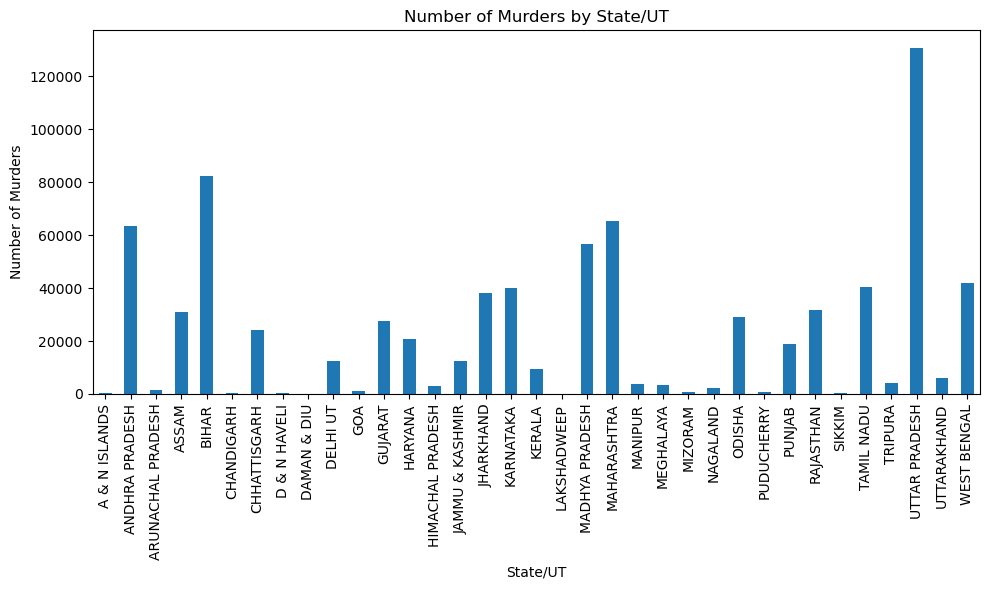

In [64]:
import matplotlib.pyplot as plt

state_murder_sum = result.groupby('STATE_UT')['MURDER'].sum()

# Convert the result to a DataFrame
state_murder_count = pd.DataFrame(state_murder_sum)

# Plot the bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
state_murder_sum.plot(kind='bar', legend=None)
plt.title('Number of Murders by State/UT')
plt.xlabel('State/UT')
plt.ylabel('Number of Murders')
plt.xticks(rotation=90)
plt.tight_layout()  
plt.show()


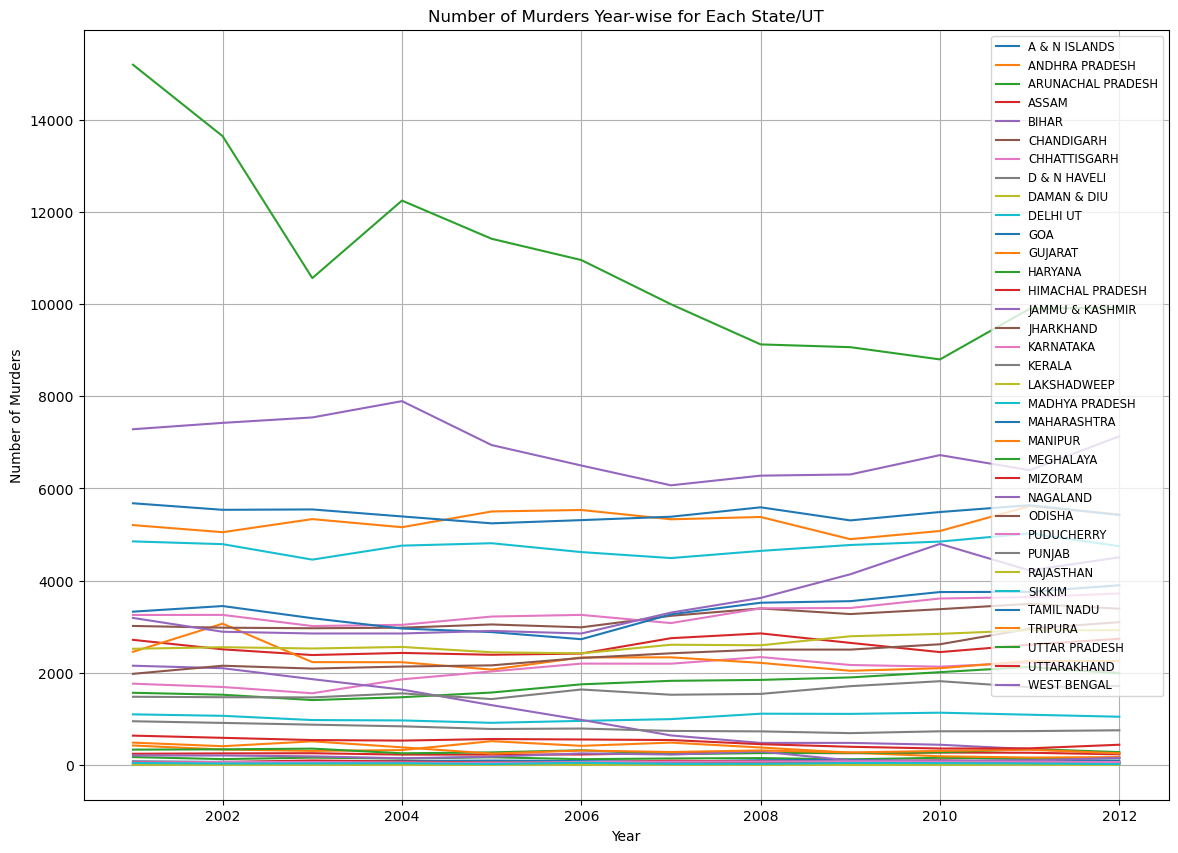

In [66]:

murders_by_state_year = result.groupby(['STATE_UT', 'YEAR'])['MURDER'].sum().reset_index()

# Plotting
plt.figure(figsize=(14, 10))

# Iterate over each state and plot the murders year-wise
for state, data in murders_by_state_year.groupby('STATE_UT'):
    plt.plot(data['YEAR'], data['MURDER'], label=state)

plt.xlabel('Year')
plt.ylabel('Number of Murders')
plt.title('Number of Murders Year-wise for Each State/UT')
plt.legend(fontsize='small')
plt.grid(True)
plt.show()
